In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lines = True is added otherwise we are getting a Value error
df1 = pd.read_json('C:/Users/anna/Downloads/news-category-dataset/News_Category_Dataset_v2.json', lines=True)

In [3]:
df2 = pd.read_csv('C:/Users/anna/Downloads/scraped_data.csv')  

In [4]:
df1.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [5]:
# Check how many rows there are in the first dataset
print(len(df1))

200853


In [6]:
df2.head()

,Unnamed: 0,_id,headline,article,date,category
0,0,5eb2fa9c28431efad3712d16,From Loss Of Smell To 'COVID Toes': What Exper...,It's not just a fever and dry cough. For milde...,2020-05-06,Goats and Soda
1,1,5eb2fa9c28431efad3712d17,"As Businesses Reopen, A Fight Is Brewing Over ...",Republican Senate Leader Mitch McConnell insis...,2020-05-06,Coronavirus Live Updates
2,2,5eb2fa9c28431efad3712d18,"Michigan Legislature Sues Gov. Whitmer, Seekin...",The legislators say the governor is acting ill...,2020-05-06,Coronavirus Live Updates
3,3,5eb2fa9c28431efad3712d19,The Risk Of Coronavirus In Afghanistan's Priso...,The Taliban accuse the government of spreading...,2020-05-06,Coronavirus Live Updates
4,4,5eb2fa9c28431efad3712d1a,Officials Investigating Multiple COVID-19 Deat...,Multiple investigations are underway at the So...,2020-05-06,Coronavirus Live Updates


In [7]:
# Check how many rows there are in the second dataset
print(len(df2))

27035


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
authors              200853 non-null object
category             200853 non-null object
date                 200853 non-null datetime64[ns]
headline             200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 6 columns):
Unnamed: 0    27035 non-null int64
_id           27035 non-null object
headline      27035 non-null object
article       27035 non-null object
date          27035 non-null object
category      27035 non-null object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


Check for missing values

In [10]:
df1.isnull().sum()

authors              0
category             0
date                 0
headline             0
link                 0
short_description    0
dtype: int64

In [11]:
df2.isnull().sum()

Unnamed: 0    0
_id           0
headline      0
article       0
date          0
category      0
dtype: int64

We can see that there are no missing values

## Count words and characters on titles
We can generate some graphs to see what is the mean number and standard deviation for the length of titles in terms of number 
of words and number of characters. Then, we can analyze the word density for the news titles

In [12]:
# we can count number of words and number of characters per headline, as well as the word density, which is the number of words
# per number of characters
df1['word_count'] = df1['headline'].apply(lambda x : len(x.split()))
df2['word_count'] = df2['headline'].apply(lambda x : len(x.split()))

In [13]:
df1['char_count'] = df1['headline'].apply(lambda x : len(x.replace(" ","")))
df2['char_count'] = df2['headline'].apply(lambda x : len(x.replace(" ","")))

In [14]:
df1['word_density'] = df1['word_count'] / (df1['char_count'] + 1)
df2['word_density'] = df2['word_count'] / (df2['char_count'] + 1)

In [15]:
df1[['word_count', 'char_count', 'word_density']].head()

,word_count,char_count,word_density
0,14,51,0.269231
1,14,62,0.222222
2,10,38,0.256410
3,11,59,0.183333
4,13,59,0.216667


We can see some statistics for number of words, characters and word density

In [16]:
df1['word_count'].describe()

count    200853.000000
mean          9.538563
std           3.089320
min           0.000000
25%           7.000000
50%          10.000000
75%          12.000000
max          44.000000
Name: word_count, dtype: float64

In [17]:
df1['char_count'].describe()

count    200853.000000
mean         49.399068
std          16.178102
min           0.000000
25%          38.000000
50%          50.000000
75%          60.000000
max         300.000000
Name: char_count, dtype: float64

In [18]:
df1['word_density'].describe()

count    200853.000000
mean          0.192067
std           0.034573
min           0.000000
25%           0.168831
50%           0.189655
75%           0.212766
max           0.800000
Name: word_density, dtype: float64

Plot the statistics 

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


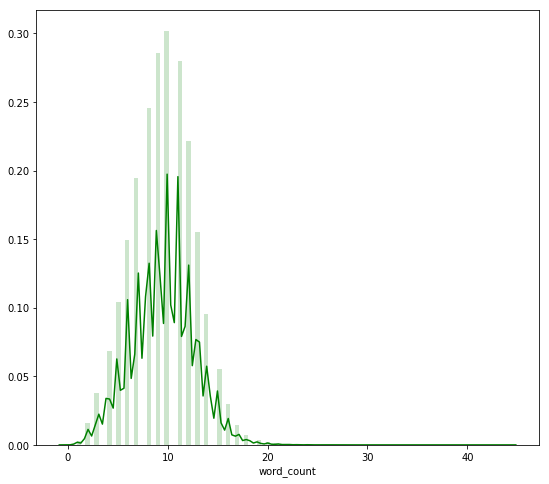

In [19]:
plt.figure(figsize=(9, 8))
sns.distplot(df1['word_count'], color='g', bins=100, hist_kws={'alpha': 0.2});

Here we can see the distribution of number of words in news titles.
The most frequent number of words in titles is around 10 words, as the peak of the graph indicates. 
We can also see that very very few titles have more than 20 words

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


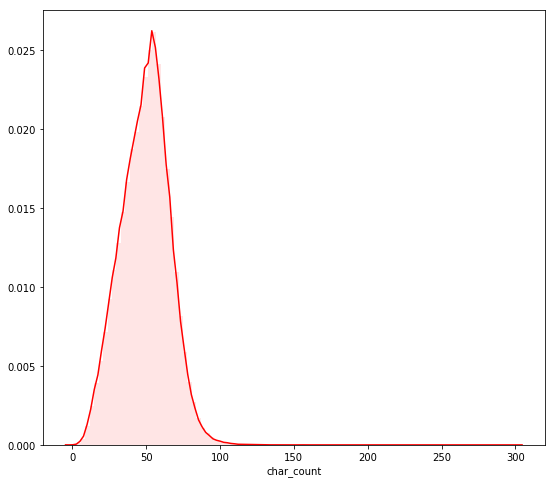

In [20]:
plt.figure(figsize=(9, 8))
sns.distplot(df1['char_count'], color='red', bins=100, hist_kws={'alpha': 0.1});

Most news titles have around 50 characters, and only few titles have more than 100 characters.

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


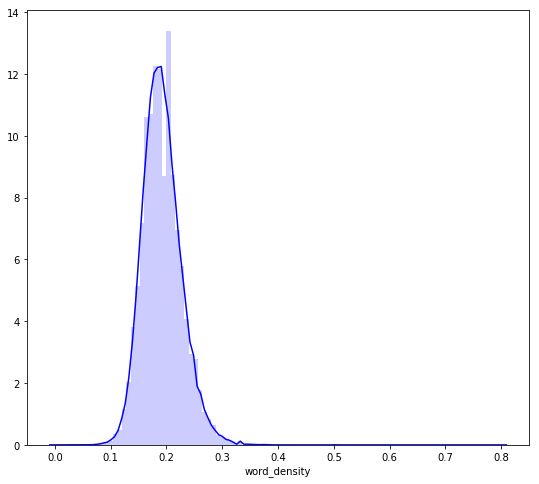

In [21]:
plt.figure(figsize=(9, 8))
sns.distplot(df1['word_density'], color='blue', bins=100, hist_kws={'alpha': 0.2});

We can repeat the same analysis for the 2nd dataset

In [22]:
df2[['word_count', 'char_count', 'word_density']].head()

,word_count,char_count,word_density
0,13,64,0.200000
1,11,58,0.186441
2,11,73,0.148649
3,11,68,0.159420
4,9,72,0.123288


Check the statistics

In [23]:
df2['word_count'].describe()

count    27035.00000
mean        10.52347
std          2.15827
min          2.00000
25%          9.00000
50%         11.00000
75%         12.00000
max         18.00000
Name: word_count, dtype: float64

In [24]:
df2['char_count'].describe()

count    27035.000000
mean        56.560940
std         10.456147
min          7.000000
25%         50.000000
50%         58.000000
75%         64.000000
max         86.000000
Name: char_count, dtype: float64

In [25]:
df2['word_density'].describe()

count    27035.000000
mean         0.184365
std          0.029227
min          0.087719
25%          0.163934
50%          0.181818
75%          0.203125
max          0.350000
Name: word_density, dtype: float64

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


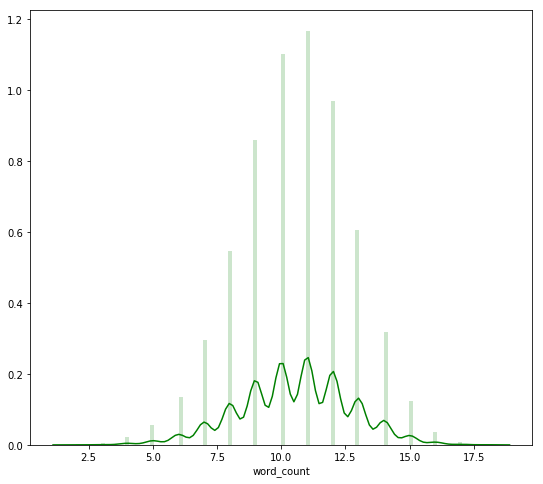

In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(df2['word_count'], color='g', bins=100, hist_kws={'alpha': 0.2});

Most articles of the 2nd dataset have titles of 11 words. 
Very few titles have more than 17 words or less than 2 words.

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


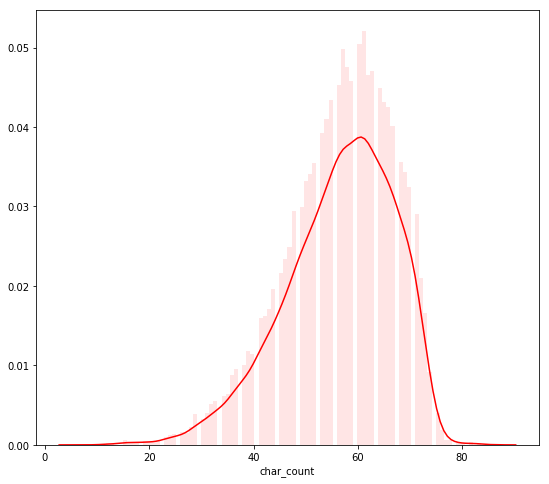

In [27]:
plt.figure(figsize=(9, 8))
sns.distplot(df2['char_count'], color='red', bins=100, hist_kws={'alpha': 0.1});

Most titles have around 60 characters, while few have less than 20 and few more than 80.

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


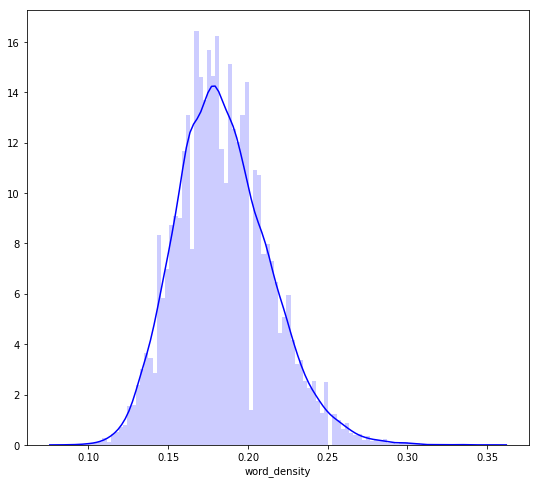

In [28]:
plt.figure(figsize=(9, 8))
sns.distplot(df2['word_density'], color='blue', bins=100, hist_kws={'alpha': 0.2});

## Check statistics per years, months and days
From each article's date, we can extract year, month and day. 
We can create new columns in the dataframe to store those data and afterwards, group by year, month and day to see statistics

In [29]:
# Based on the format of the dates for both datasets:
# yyyy-mm-dd
df1['year'] = df1['date'].apply(lambda x : str(x)[0:4])
df2['year'] = df2['date'].apply(lambda x : str(x)[0:4])

In [30]:
df1['month'] = df1['date'].apply(lambda x : str(x)[5:7])
df2['month'] = df2['date'].apply(lambda x : str(x)[5:7])

In [31]:
df1['day'] = df1['date'].apply(lambda x : str(x)[8:10])
df2['day'] = df2['date'].apply(lambda x : str(x)[8:10])

In [32]:
df1[['year', 'month', 'day']].head()

,year,month,day
0,2018,05,26
1,2018,05,26
2,2018,05,26
3,2018,05,26
4,2018,05,26


In [33]:
df1['year'].describe()

count     200853
unique         7
top         2013
freq       34583
Name: year, dtype: object

In [34]:
df1['month'].describe()

count     200853
unique        12
top           03
freq       18418
Name: month, dtype: object

In [35]:
df1['day'].describe()

count     200853
unique        31
top           14
freq        6756
Name: day, dtype: object

In [36]:
# count number of articles per year and per month (for all years)
num_of_headlines1 = df1.groupby('year').count()
num_of_headlines2 = df1.groupby('month').count()
num_of_headlines3 = df1.groupby('day').count()
num_of_headlines1.head()

,authors,category,date,headline,link,short_description,word_count,char_count,word_density,month,day
year,,,,,,,,,,,
2012,31355,31355,31355,31355,31355,31355,31355,31355,31355,31355,31355
2013,34583,34583,34583,34583,34583,34583,34583,34583,34583,34583,34583
2014,32339,32339,32339,32339,32339,32339,32339,32339,32339,32339,32339
2015,32006,32006,32006,32006,32006,32006,32006,32006,32006,32006,32006
2016,32098,32098,32098,32098,32098,32098,32098,32098,32098,32098,32098


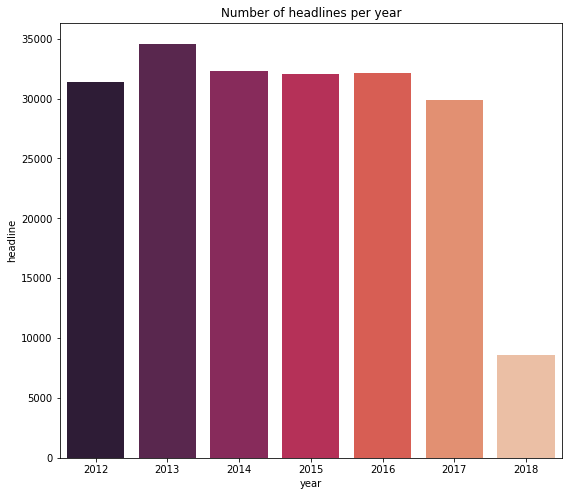

In [37]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines1.index, y=num_of_headlines1.headline, palette="rocket")
plt.title('Number of headlines per year')
plt.show()

2013 had the more articles until now, while 2018 had less titles.
Of course, our datasets has articles until 2018 only. 
So, it may not contain all the articles for 2018.

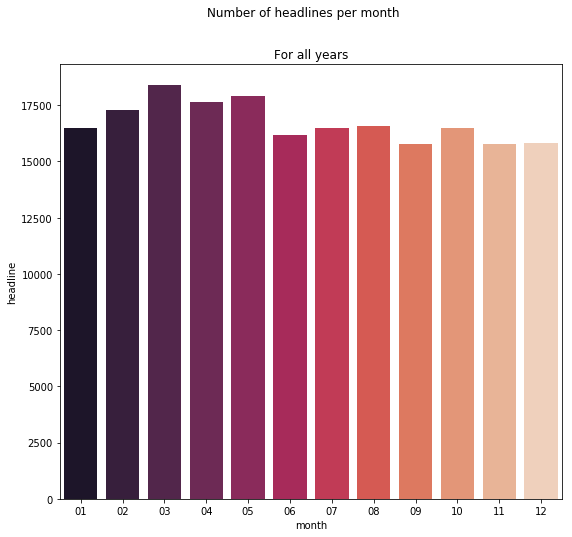

In [38]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines2.index, y=num_of_headlines2.headline, palette="rocket")
plt.suptitle('Number of headlines per month')
plt.title('For all years')
plt.show()

March (03) has the most titles, while September, November and December have the less

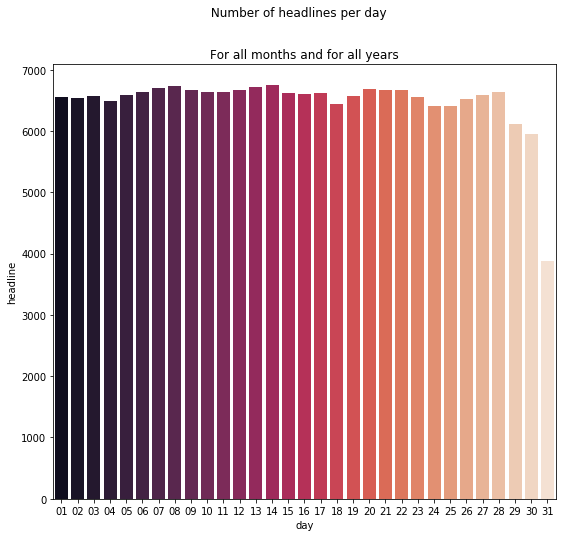

In [39]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines3.index, y=num_of_headlines3.headline, palette="rocket")
plt.suptitle(' Number of headlines per day')
plt.title('For all months and for all years')
plt.show()

Almost each day of the month for all months and all years has around 6500 titles,
with small fluctuations. The reason why the last days correspond to fewer titles, is because not all months have 31, 30 and 29 days.
So, we can get a clear picture if we consider the behavior from days 1 to 28.
The fluctuations may be correlated with weekends, public holidays etc, which correspond to fewer titles.
On the other hand, increased number of titles can be due to important events, like important political events (i.e. elections),
international affairs (Eurogroup etc), big sport events (Olympic games, World cup) or emergency situations (pandemics,
natural disasters, accidents etc). Over the years and over the months, reduced or increased number of articles become more
evenly spreaded, if we examine their numbers per day.

In [40]:
df2[['year', 'month', 'day']].head()

,year,month,day
0,2020,05,06
1,2020,05,06
2,2020,05,06
3,2020,05,06
4,2020,05,06


In [41]:
df2['year'].describe()

count     27035
unique        6
top        2016
freq       7054
Name: year, dtype: object

In [42]:
df2['month'].describe()

count     27035
unique       12
top          03
freq       2922
Name: month, dtype: object

In [43]:
df2['day'].describe()

count     27035
unique       31
top          17
freq        937
Name: day, dtype: object

In [44]:
num_of_headlines4 = df2.groupby('year').count()
num_of_headlines5 = df2.groupby('month').count()
num_of_headlines6 = df2.groupby('day').count()
num_of_headlines4.head(10)

,Unnamed: 0,_id,headline,article,date,category,word_count,char_count,word_density,month,day
year,,,,,,,,,,,
2015,15,15,15,15,15,15,15,15,15,15,15
2016,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054
2017,6778,6778,6778,6778,6778,6778,6778,6778,6778,6778,6778
2018,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325,6325
2019,4825,4825,4825,4825,4825,4825,4825,4825,4825,4825,4825
2020,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038


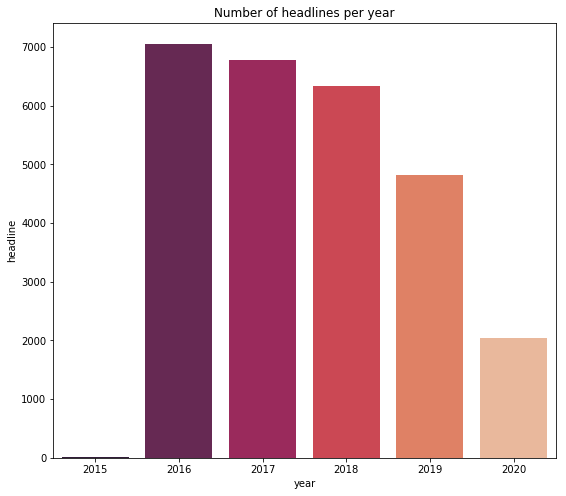

In [45]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines4.index, y=num_of_headlines4.headline, palette="rocket")
plt.title('Number of headlines per year')
plt.show()

2016 had more headlines, while 2020 is ongoing, so we have fewer titles

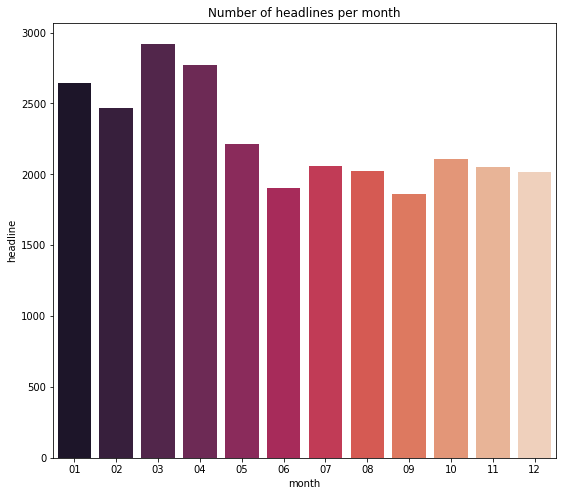

In [46]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines5.index, y=num_of_headlines5.headline, palette="rocket")
plt.title('Number of headlines per month')
plt.show()

March had again the most titles, like it happened with the previous dataset.
This can indicate that for the years we examine, important events happen mostly in March, resulting in more articles.
Fewer titles are observed during July or September.
The previous dataset had again few publications in September, compared to other months.
This can indicate that in Septembers not many things are going on, for the years we examine.

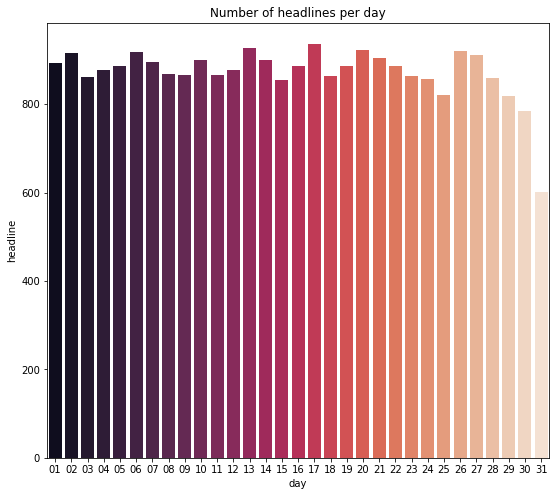

In [47]:
plt.figure(figsize=(9, 8))
sns.barplot(x=num_of_headlines6.index, y=num_of_headlines6.headline, palette="rocket")
plt.title('Number of headlines per day')
plt.show()

The behavior per day is similar to the one of the previous dataset, if we examine days 1-28.
More or less, there are around 700 titles published every day, with small fluctuations.

## Article Categories
We are going to count how many articles belong in each of the categories of the 2 datasets and plot the results.

In [48]:
# Group per category for the first dataset
categories1 = df1.groupby('category').count()

In [49]:
# Number of categories this dataset contains
print(len(categories1))

41


In [50]:
categories1.head()

,authors,date,headline,link,short_description,word_count,char_count,word_density,year,month,day
category,,,,,,,,,,,
ARTS,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509
ARTS & CULTURE,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339
BLACK VOICES,4528,4528,4528,4528,4528,4528,4528,4528,4528,4528,4528
BUSINESS,5937,5937,5937,5937,5937,5937,5937,5937,5937,5937,5937
COLLEGE,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144


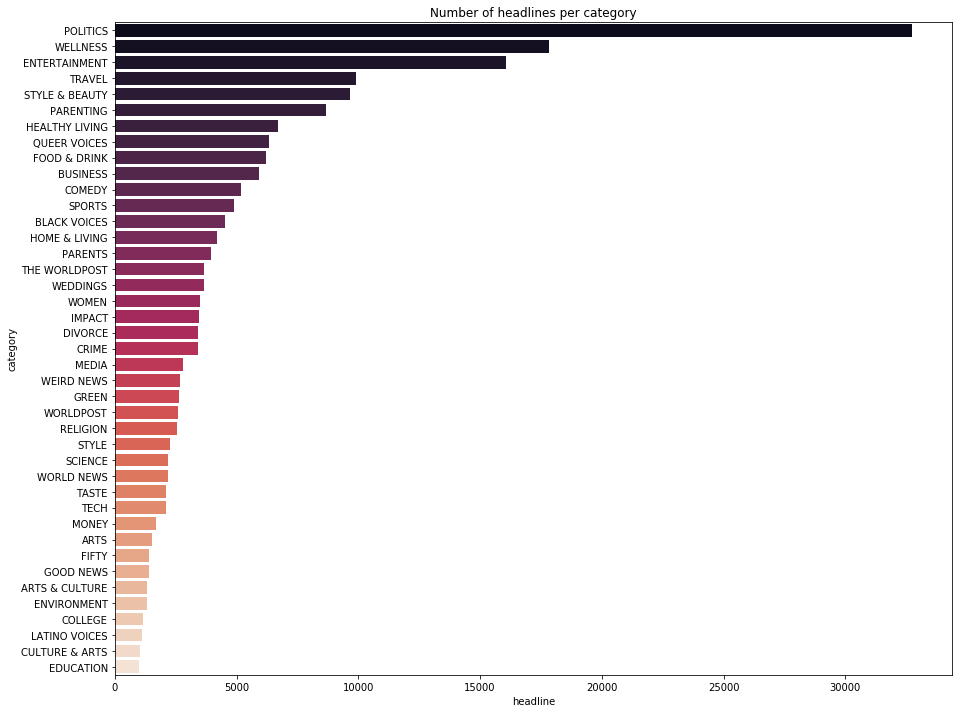

In [51]:
# Plot number of titles per category
categories1 = categories1.sort_values(by=['headline'], ascending=False)
plt.figure(figsize=(15, 12))
sns.barplot(x=categories1.headline , y= categories1.index,orient="h", palette="rocket")
plt.title('Number of headlines per category')
plt.show()

In [52]:
categories2 = df2.groupby('category').count()

In [53]:
vals = df2['category'].value_counts()
# by adding this, we can display all rows of our dataframe
pd.set_option('display.max_rows', vals.shape[0]+1)
print(vals)

The Two-Way                                                                   5658
Politics                                                                      3713
National                                                                      2821
Shots - Health News                                                           2071
Goats and Soda                                                                1161
The Salt                                                                      1060
World                                                                          845
Parallels                                                                      827
Law                                                                            579
Business                                                                       547
Coronavirus Live Updates                                                       498
NPR Ed                                                                         450
Nati

In [54]:
print(len(categories2))

242


We can see that here we have many different categories

There are many categories with only 1 article. We can delete the separate categories and consider them as one category
named 'Others'.

In [55]:
# we create a new dataframe 
# we store all the rows with values 1
all_ones = categories2.loc[categories2['headline'] == 1]

# and we select only the first row (iloc[[0]])
ones = all_ones.iloc[[0]]

In [56]:
# we keep the categories to drop them from the df2
drop_list = list(all_ones.index)

In [57]:
ones.head()

,Unnamed: 0,_id,headline,article,date,word_count,char_count,word_density,year,month,day
category,,,,,,,,,,,
#KillerViruses,1,1,1,1,1,1,1,1,1,1,1


In [58]:
# we rename the index, which has now the name #KillerViruses
ones = ones.rename(index={'#KillerViruses': "Other"})

In [59]:
# We drop all rows with values 1 in the categories2 dataframe
categories2.drop(categories2[categories2['headline'] ==1].index, inplace = True)

In [60]:
# we need to remember to drop those rows from df2
df2 = df2.drop(df2[df2['category'].isin(drop_list)].index)

In [61]:
# dataframes to be concatenated
new_df = [categories2, ones]
categories2 = pd.concat(new_df)

In [62]:
# the new rows was added in the end of the dataframe, as this is what concat does
# so we need to check the end of the dataframe
categories2.tail()

,Unnamed: 0,_id,headline,article,date,word_count,char_count,word_density,year,month,day
category,,,,,,,,,,,
Your Money,18,18,18,18,18,18,18,18,18,18,18
Your Money And Your Life,2,2,2,2,2,2,2,2,2,2,2
Zika Virus,2,2,2,2,2,2,2,2,2,2,2
custom channel - blue microphones,3,3,3,3,3,3,3,3,3,3,3
Other,1,1,1,1,1,1,1,1,1,1,1


In [63]:
# let's see how many lines we have now
print(len(categories2))

184


In [64]:
# we are adding this lines in the next cell because we want to enlarge the output window of Jupiter notebook
# since our dataset has 242 categories, and we want to plot them all
# otherwise, we would need to scroll into the window to see the plot

In [65]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

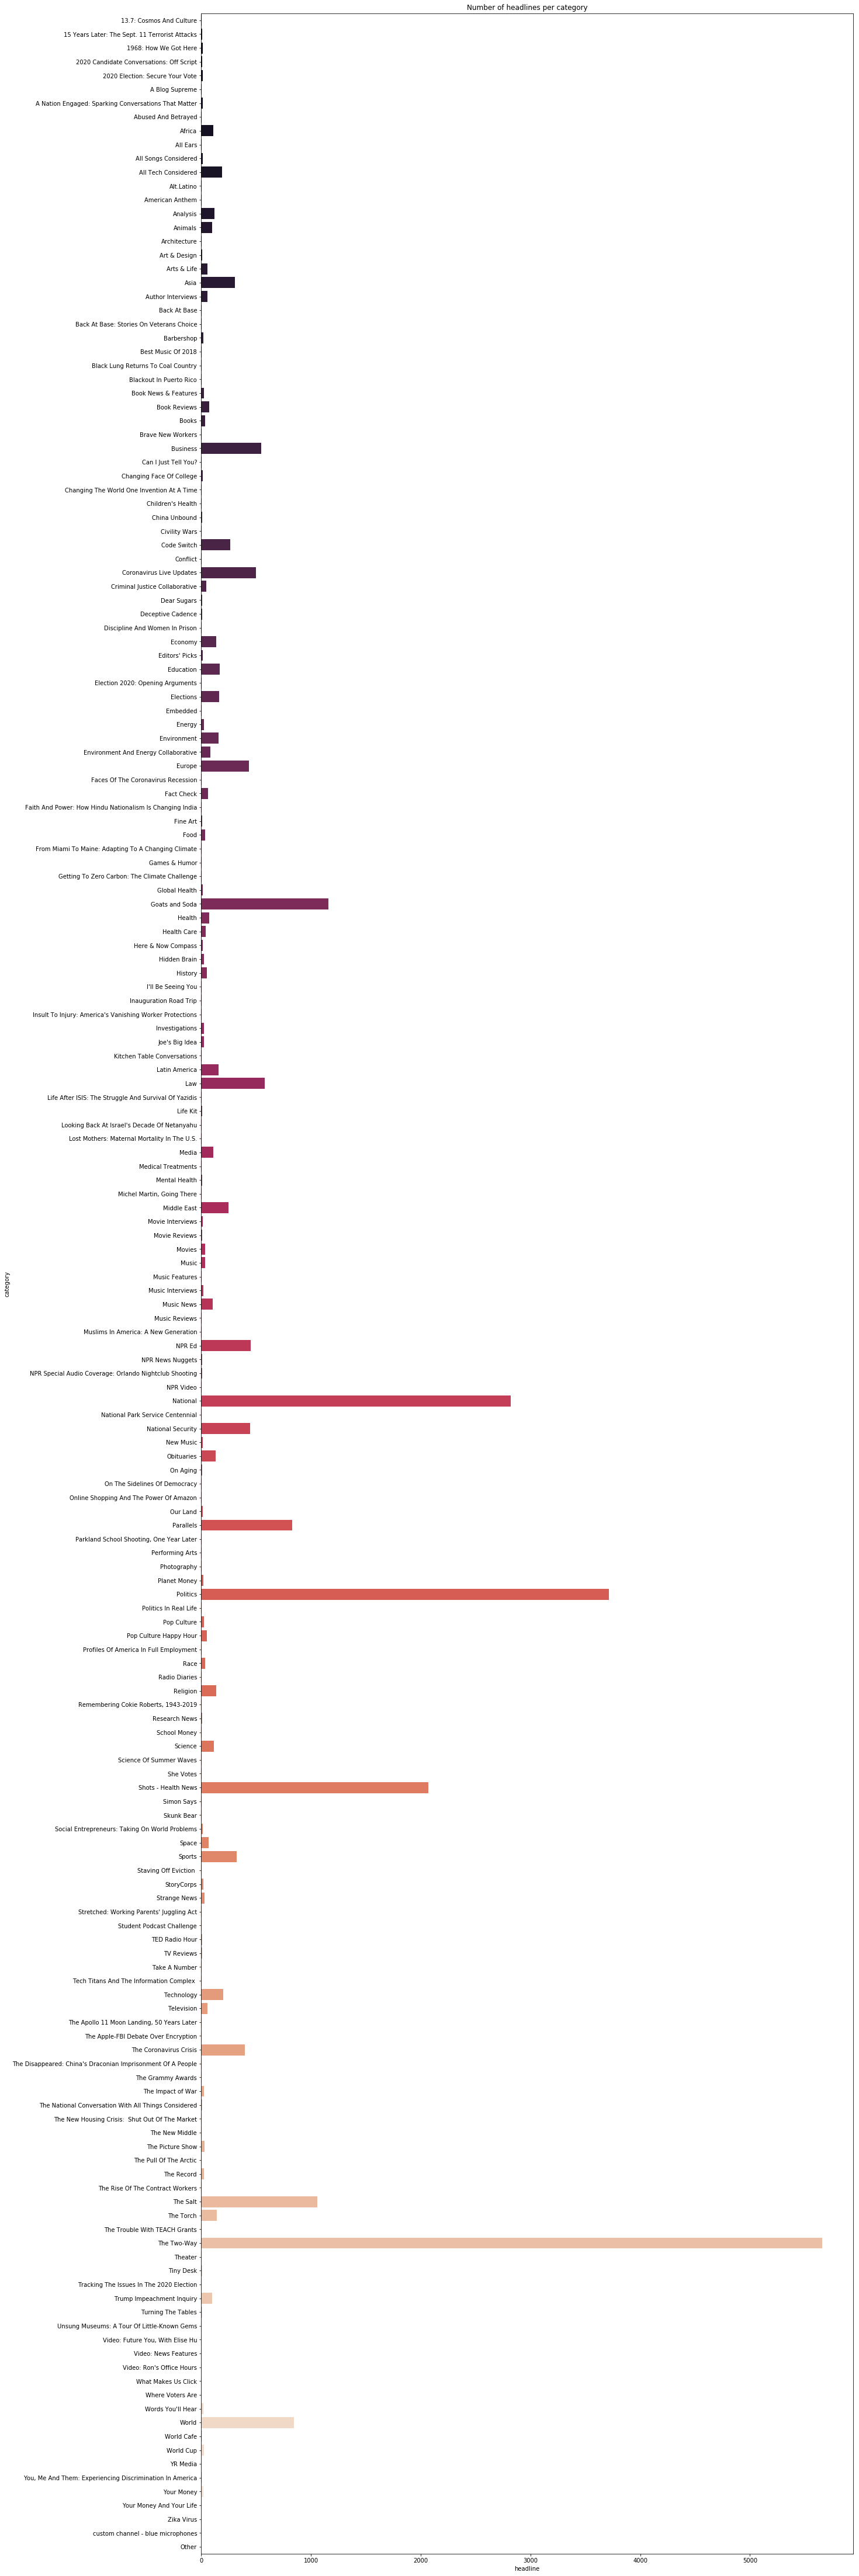

In [66]:
plt.figure(figsize=(20, 80))
sns.barplot(x=categories2.headline , y= categories2.index, orient="h", palette="rocket")
plt.title('Number of headlines per category')
plt.show()

## Number of authors
We have author information only in the 1st dataset.
We can check how many different authors there are and how many articles they have written

In [67]:
len(df1['authors'].unique())

27993

We saw before that df1 has length = 200853, while the different authors are 27993. So, some authors have written more than
1 article

In [68]:
author1 = df1.groupby('authors').count()

In [69]:
author1.head(10)

,category,date,headline,link,short_description,word_count,char_count,word_density,year,month,day
authors,,,,,,,,,,,
,36620,36620,36620,36620,36620,36620,36620,36620,36620,36620,36620
"Basil Kreimendahl, Contributor\nPlaywright",1,1,1,1,1,1,1,1,1,1,1
"Bill Bigelow, ContributorRethinking Schools curriculum editor, Zinn Education Project c...",1,1,1,1,1,1,1,1,1,1,1
"Bustle, Contributor\nNews, entertainment, lifestyle site",2,2,2,2,2,2,2,2,2,2,2
"Bustle, ContributorNews, entertainment, lifestyle site",1,1,1,1,1,1,1,1,1,1,1
"Cristian Farias, Elise Foley, and Willa Frej",1,1,1,1,1,1,1,1,1,1,1
"Jamie Walker, ContributorCEO and Founder of SweatGuru & Fit Approach",4,4,4,4,4,4,4,4,4,4,4
"Josh Horwitz, ContributorExecutive Director, Coalition to Stop Gun Violence",2,2,2,2,2,2,2,2,2,2,2
"LINDA NOBLE TOPF, Contributor\nI am a wellness/life coach; published author, WHEELCHAIR WISDO...",17,17,17,17,17,17,17,17,17,17,17


In [70]:
author1['headline'].describe()

count    27993.000000
mean         7.175115
std        222.819223
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      36620.000000
Name: headline, dtype: float64

C:\Users\anna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


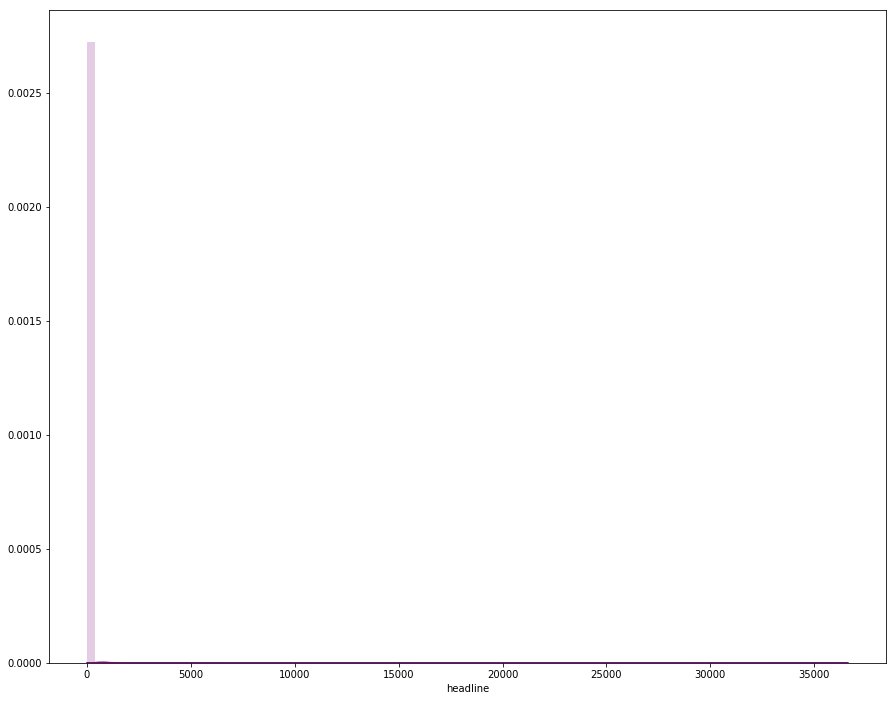

In [71]:
plt.figure(figsize=(15, 12))
sns.distplot(author1['headline'], color='purple', bins=100, hist_kws={'alpha': 0.2});

By the plot and the statistics, we can see that at least half of the authors have written only 1 article, 
while 75% of the authors have written up to 3 articles.
This is why the distribution is a very concentrated peak near 1.
There are very few authors that have written many articles, although the maximum number of articles an author has written 
is 36620.

In [72]:
import numpy as np
categories = np.unique(df1['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

## Analyze categories per year

Text(0.5,1,'Hot categories per year')

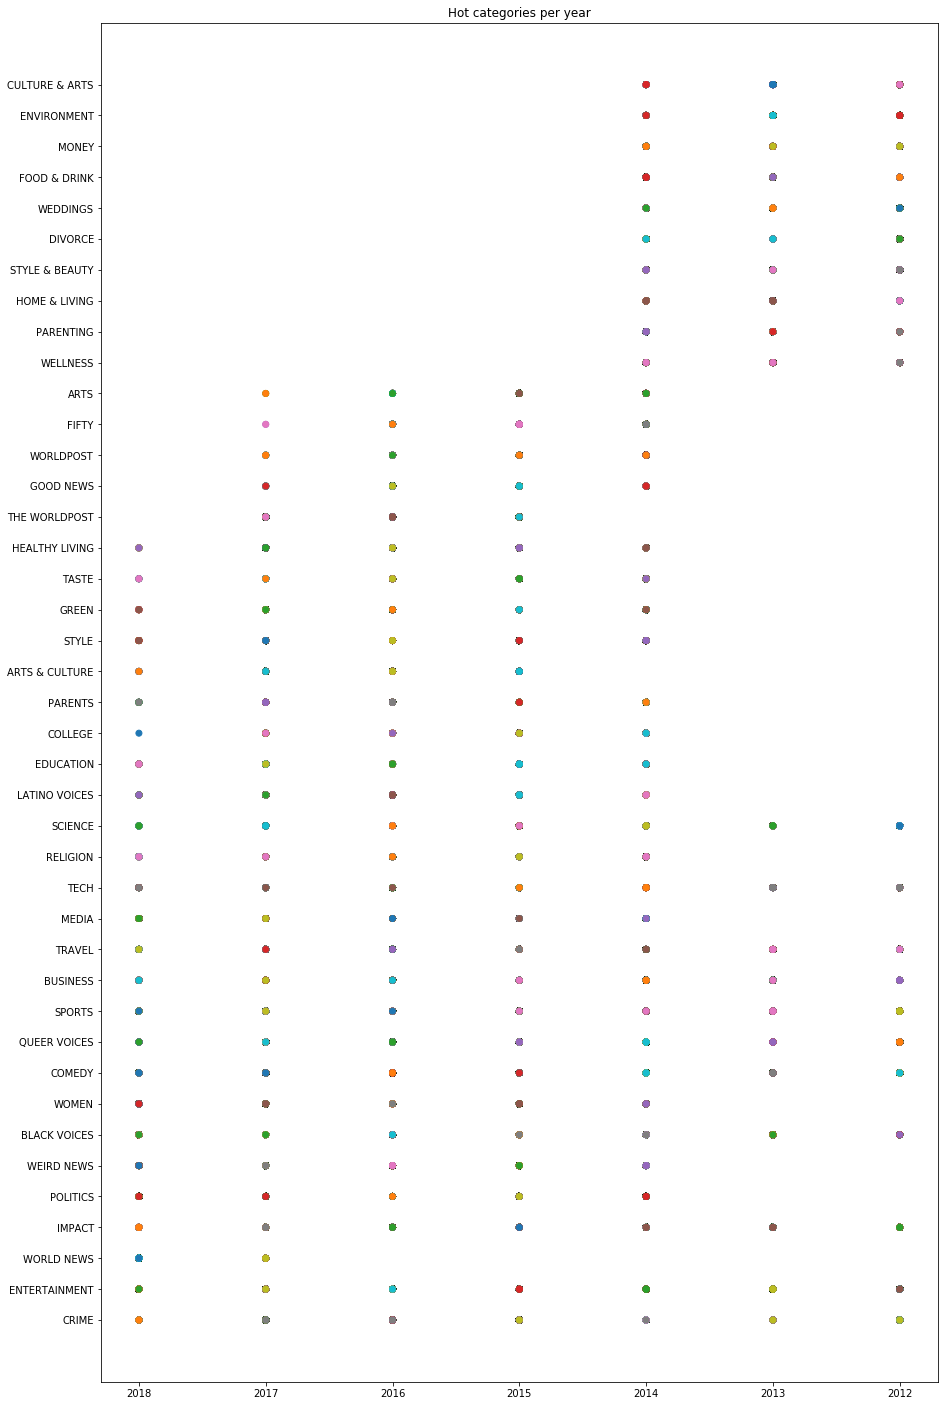

In [73]:
plt.figure(figsize=(15, 25))
plt.scatter(y=df1.category, x=df1.year,c = colors)
plt.title('Hot categories per year')

Text(0.5,1,'Hot categories per year')

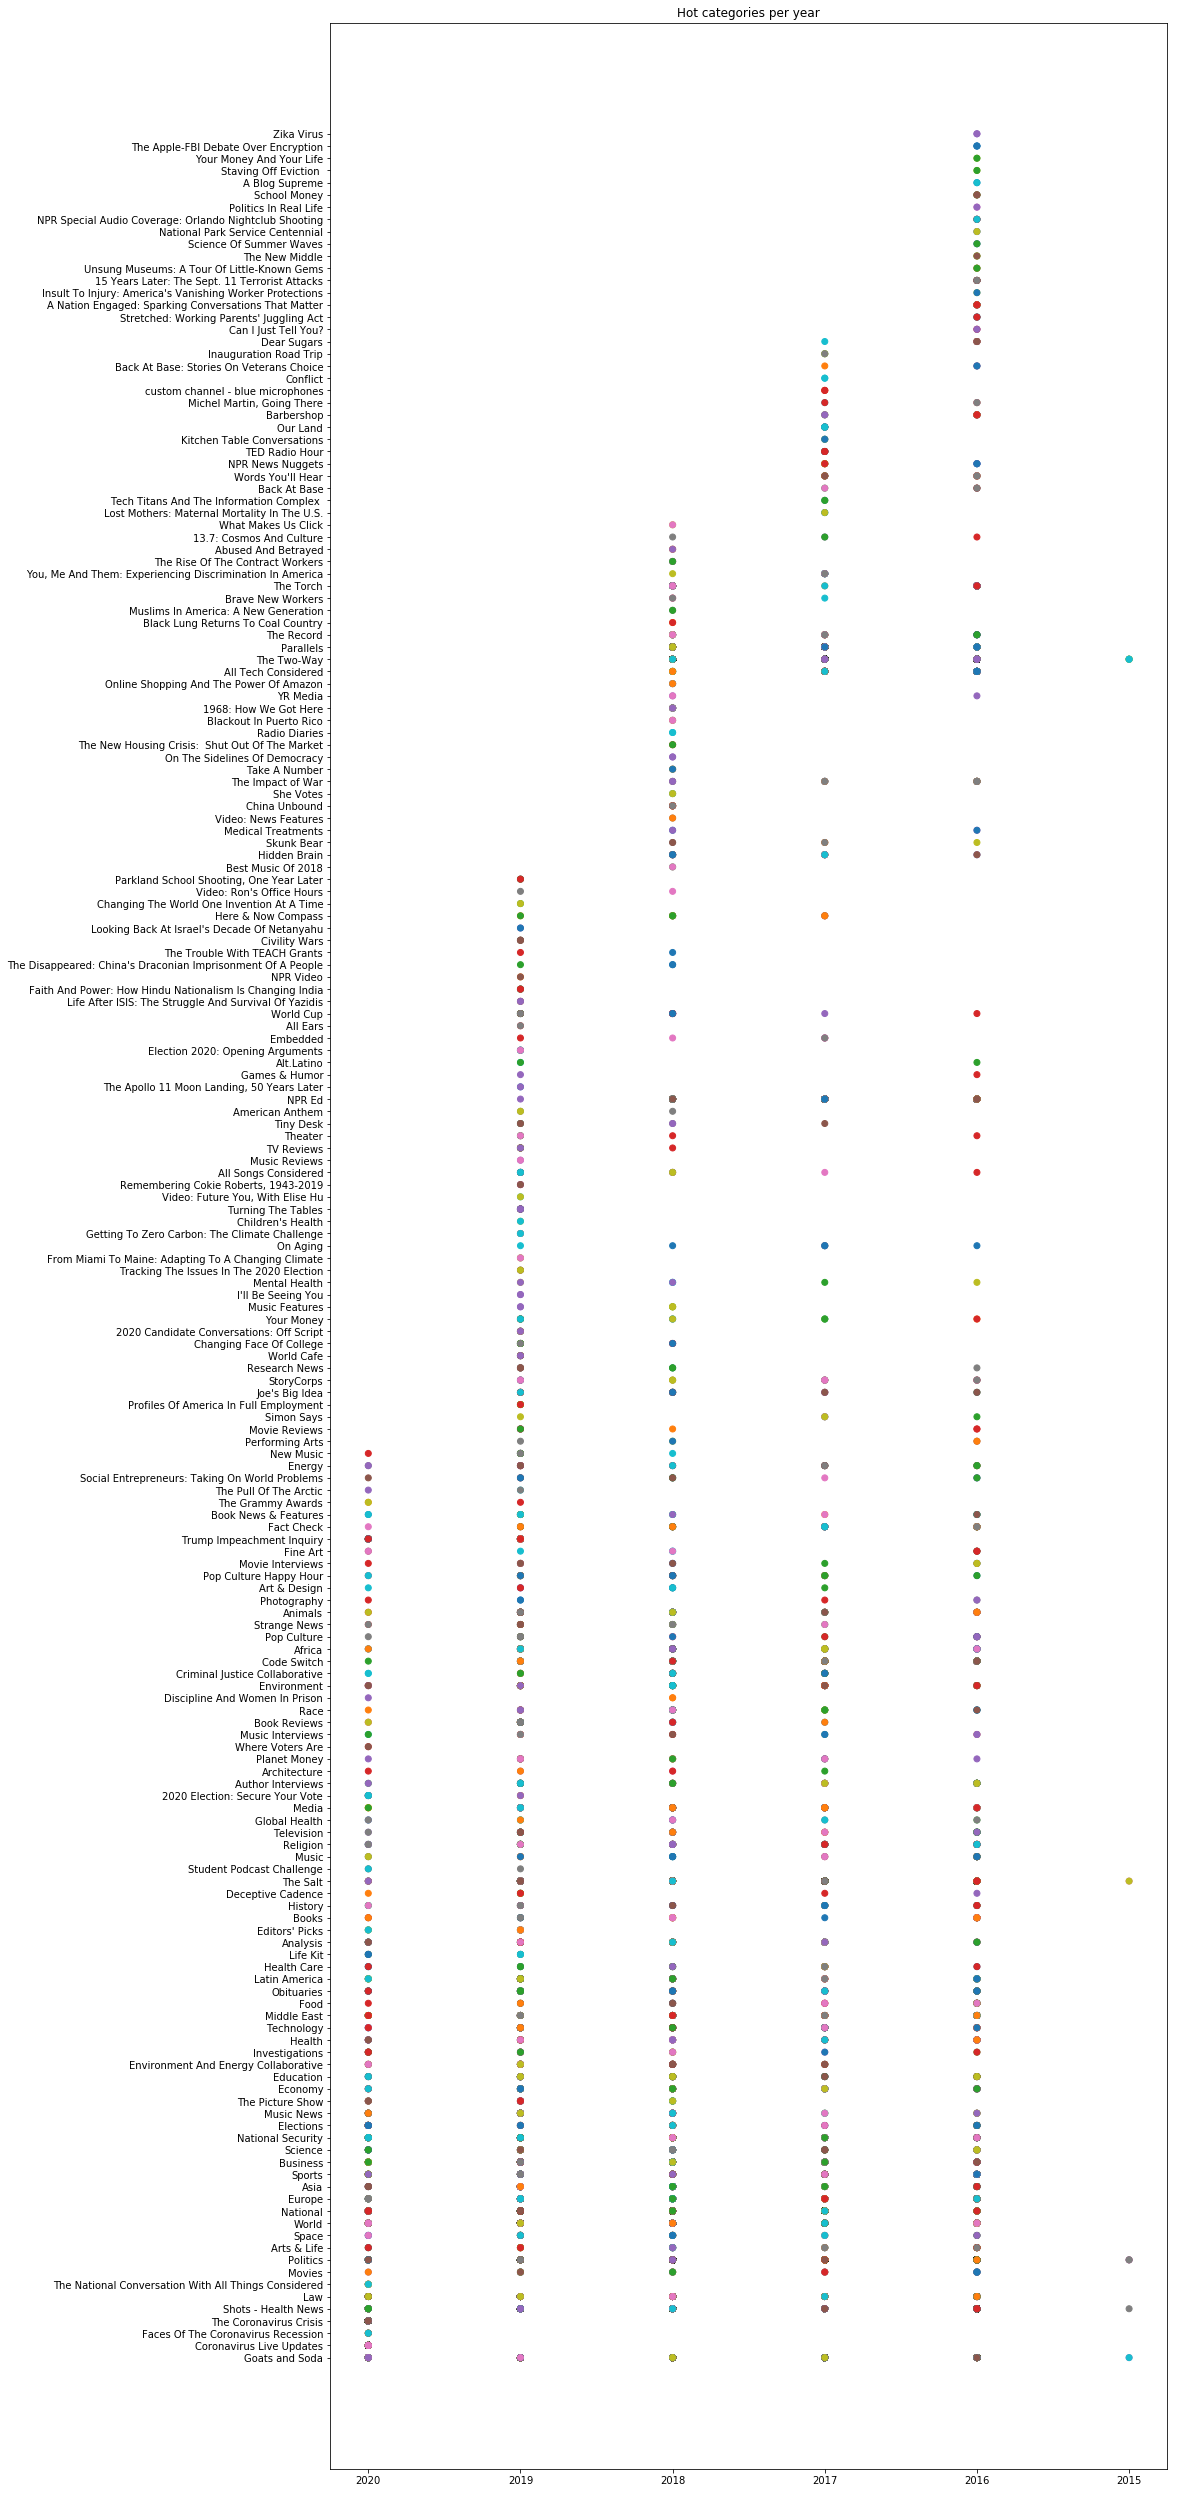

In [74]:
plt.figure(figsize=(15, 45))
plt.scatter(y=df2.category, x=df2.year,c = colors)
plt.title('Hot categories per year')

In [94]:
def group_years(df):
    years = df.groupby('year')  
    # create separate dataframes based on year
    # they are stored in a list
    y = [years.get_group(x) for x in years.groups]
    return y

In [98]:
y1 = group_years(df1)
y2 = group_years(df2)

In [106]:
def plot_per_year(y, w, h):

    for i in range(len(y)):
        cat = y[i].groupby('category').count()
        cat = cat.sort_values(by=['headline'], ascending=False)
        year = y[i].year.iloc[0]
        print('Top category', cat.iloc[[0]].index[0], 'for year',year)
        plt.figure(figsize=(l, w))
        sns.barplot(x=cat.headline , y= cat.index,orient="h", palette="rocket")
        plt.title("Number of headlines per category for year {}".format(year))
        plt.show()

    return 

Top category WELLNESS for year 2012


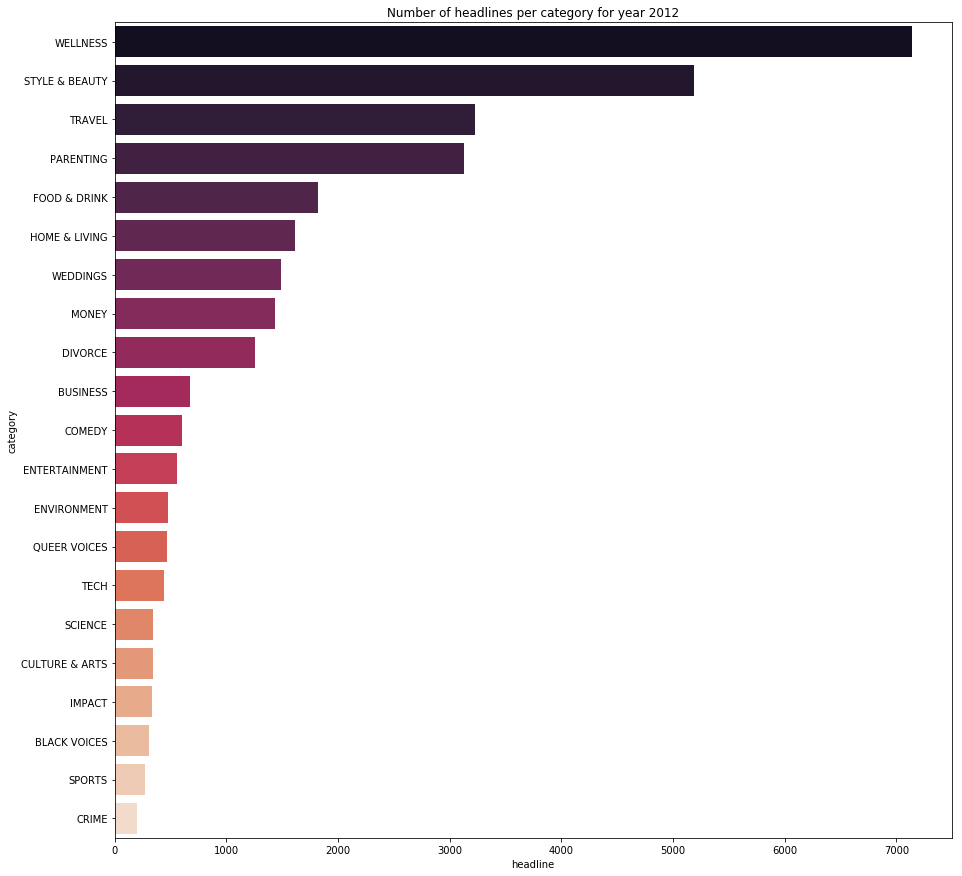

Top category WELLNESS for year 2013


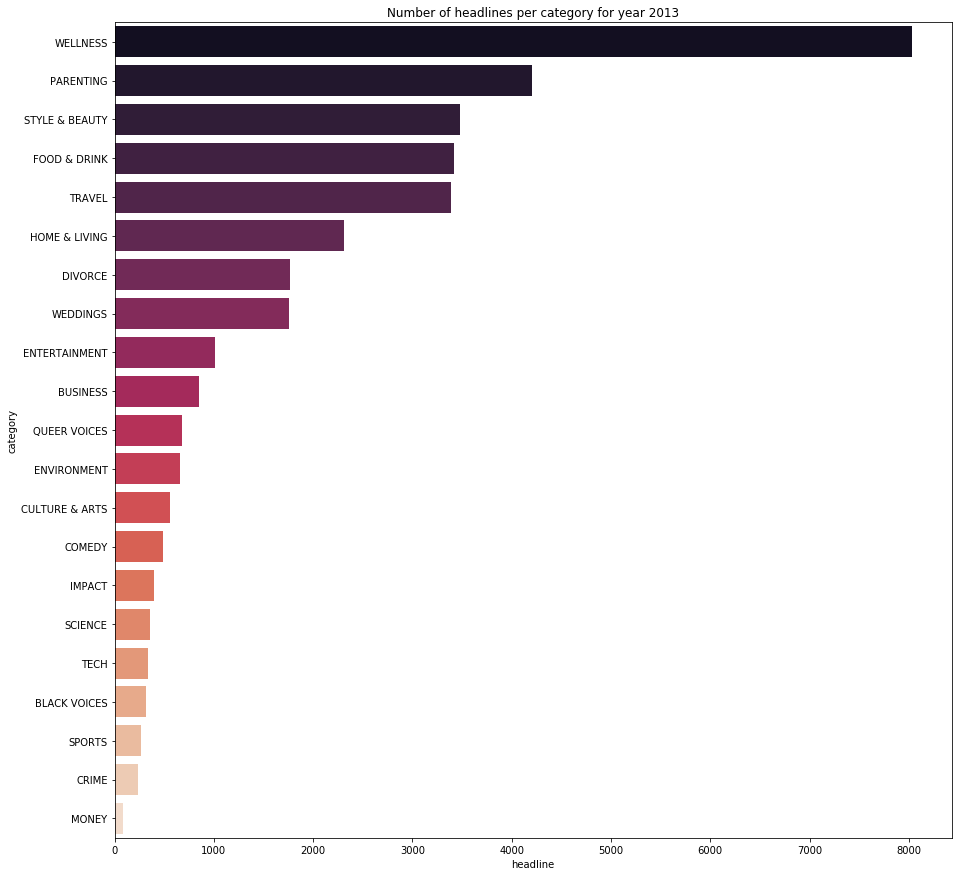

Top category POLITICS for year 2014


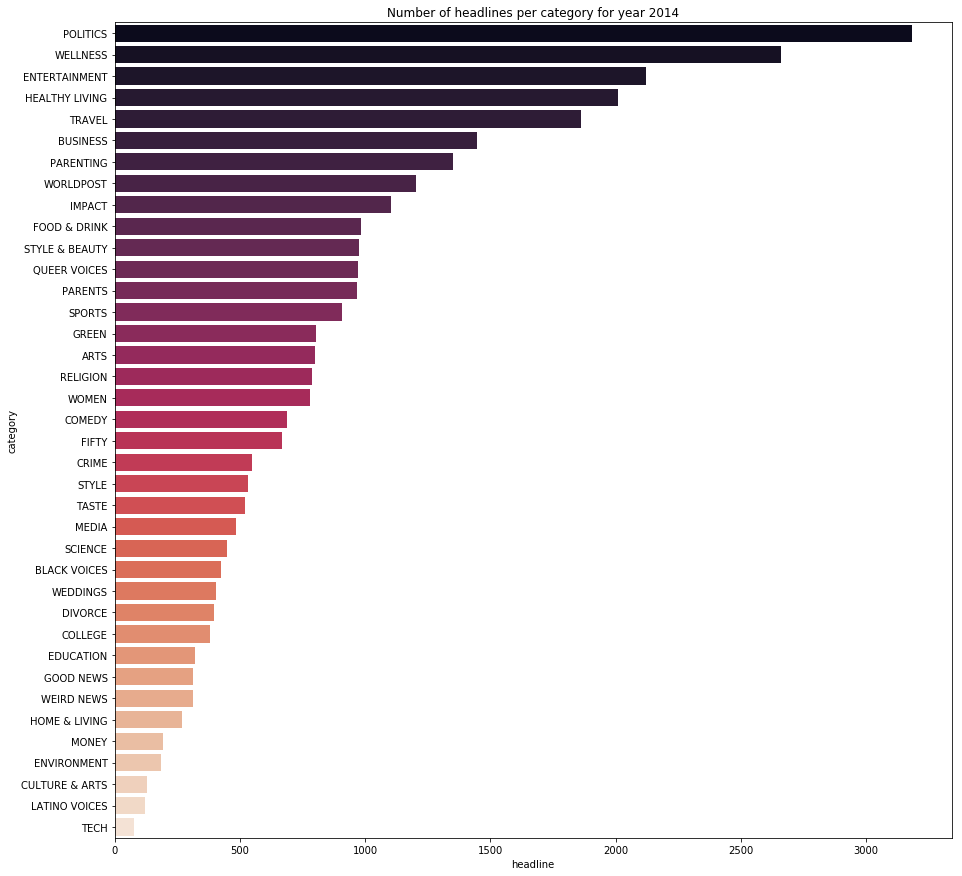

Top category POLITICS for year 2015


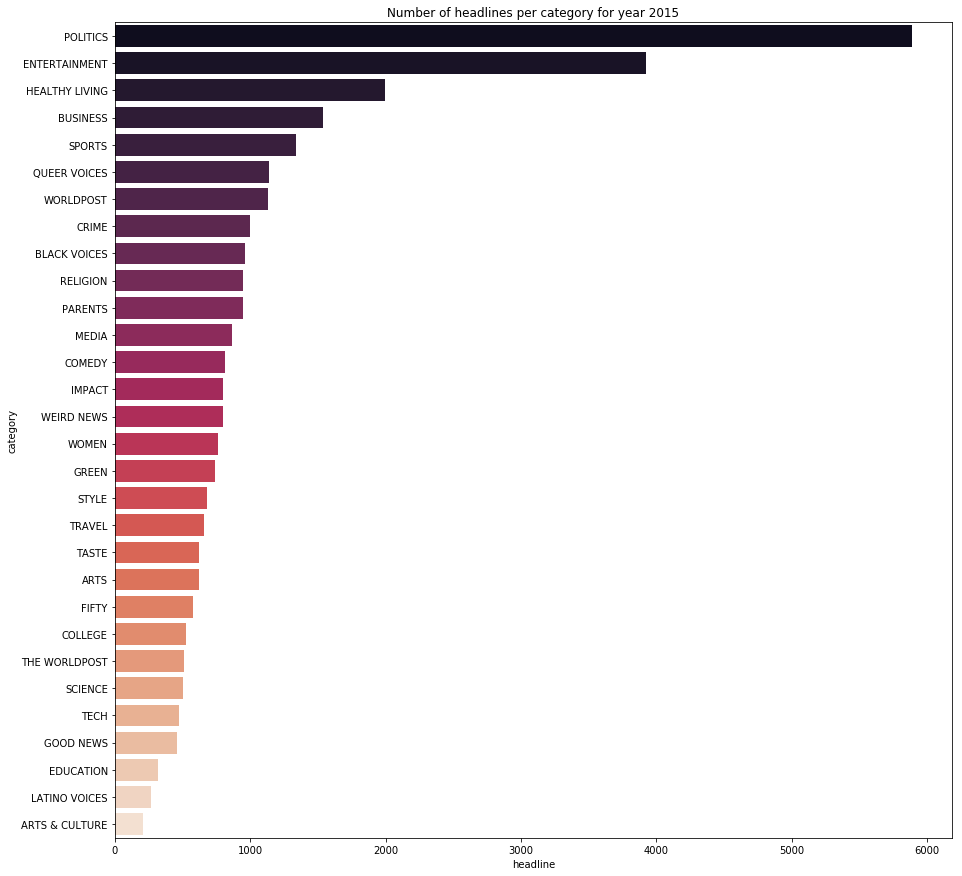

Top category POLITICS for year 2016


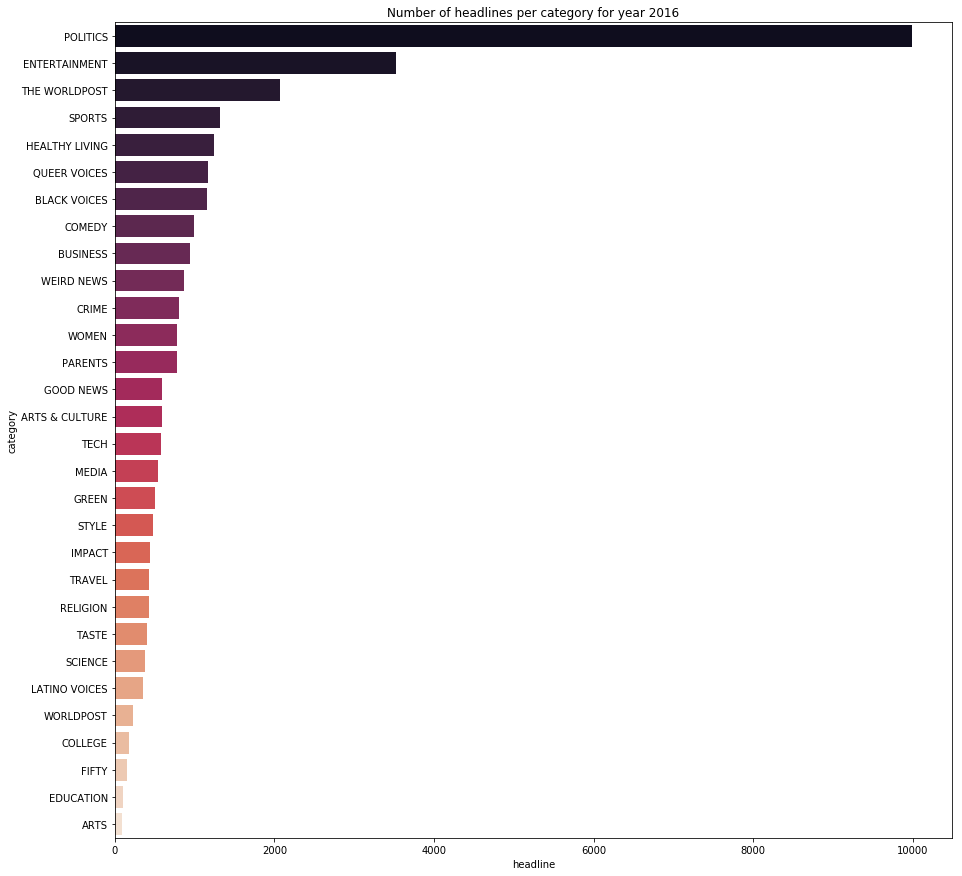

Top category POLITICS for year 2017


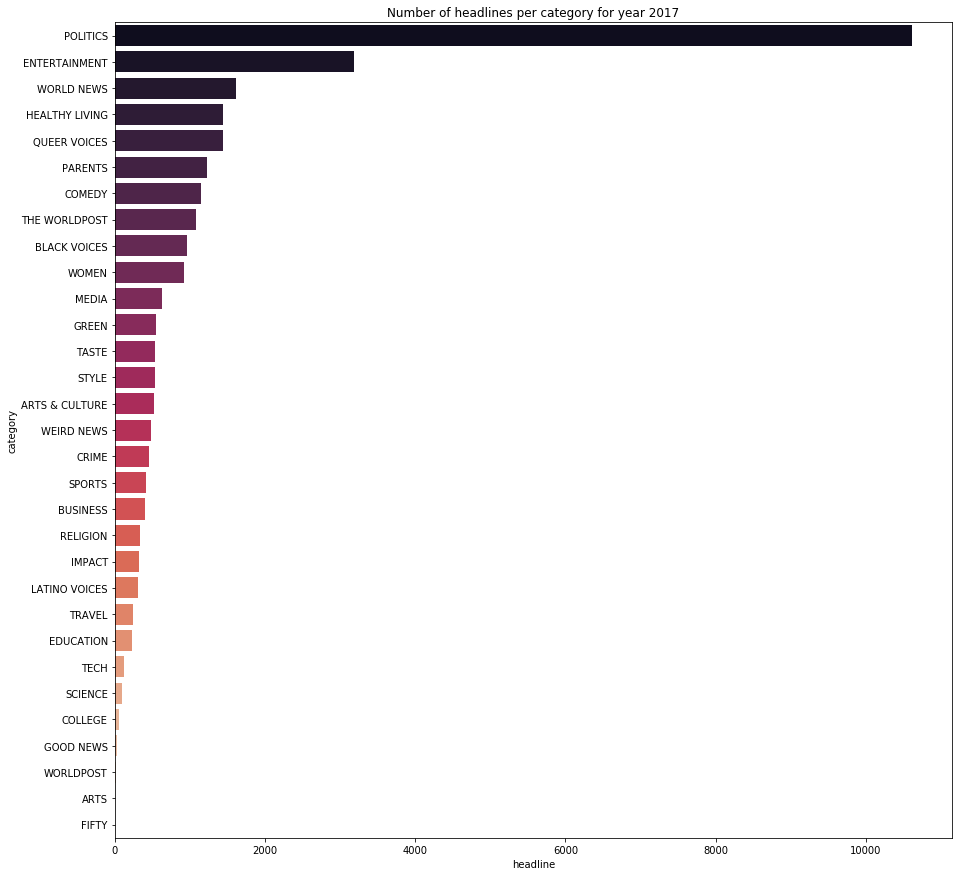

Top category POLITICS for year 2018


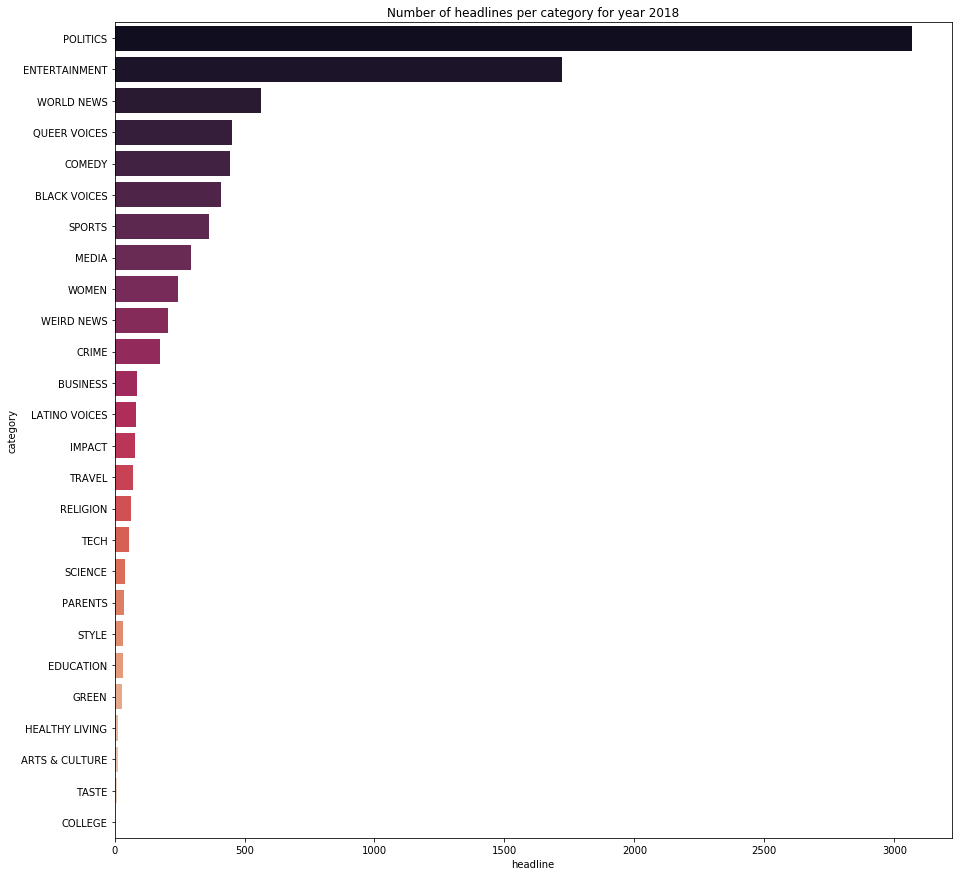

In [107]:
# figure size
w, h = 15, 12
plot_per_year(y1, w, h)

Top category The Two-Way for year 2015


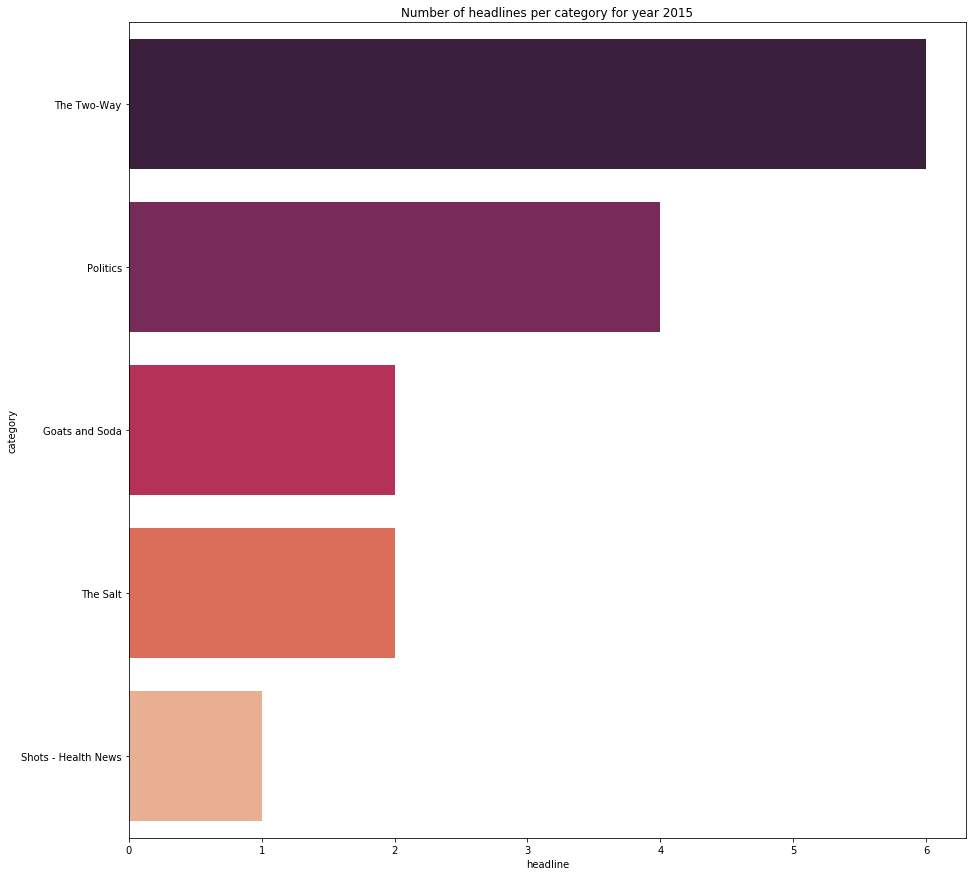

Top category The Two-Way for year 2016


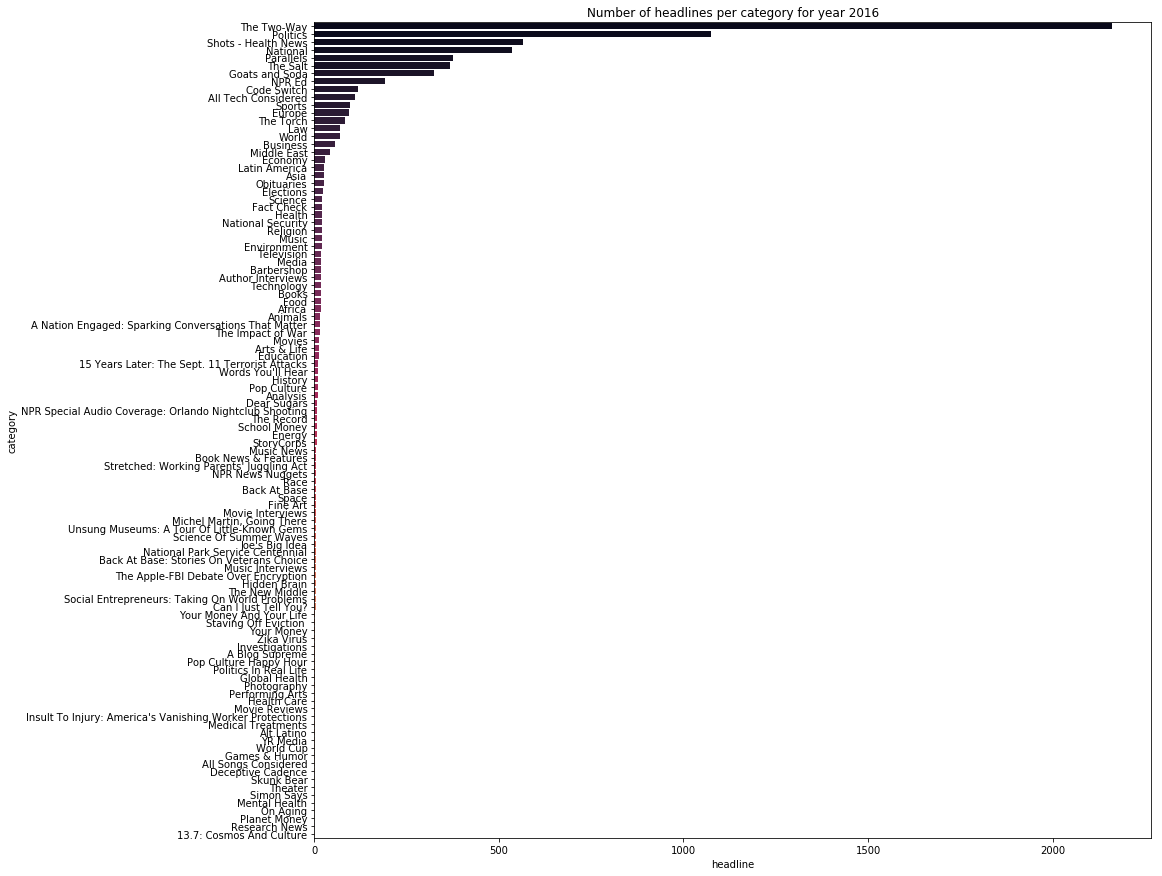

Top category The Two-Way for year 2017


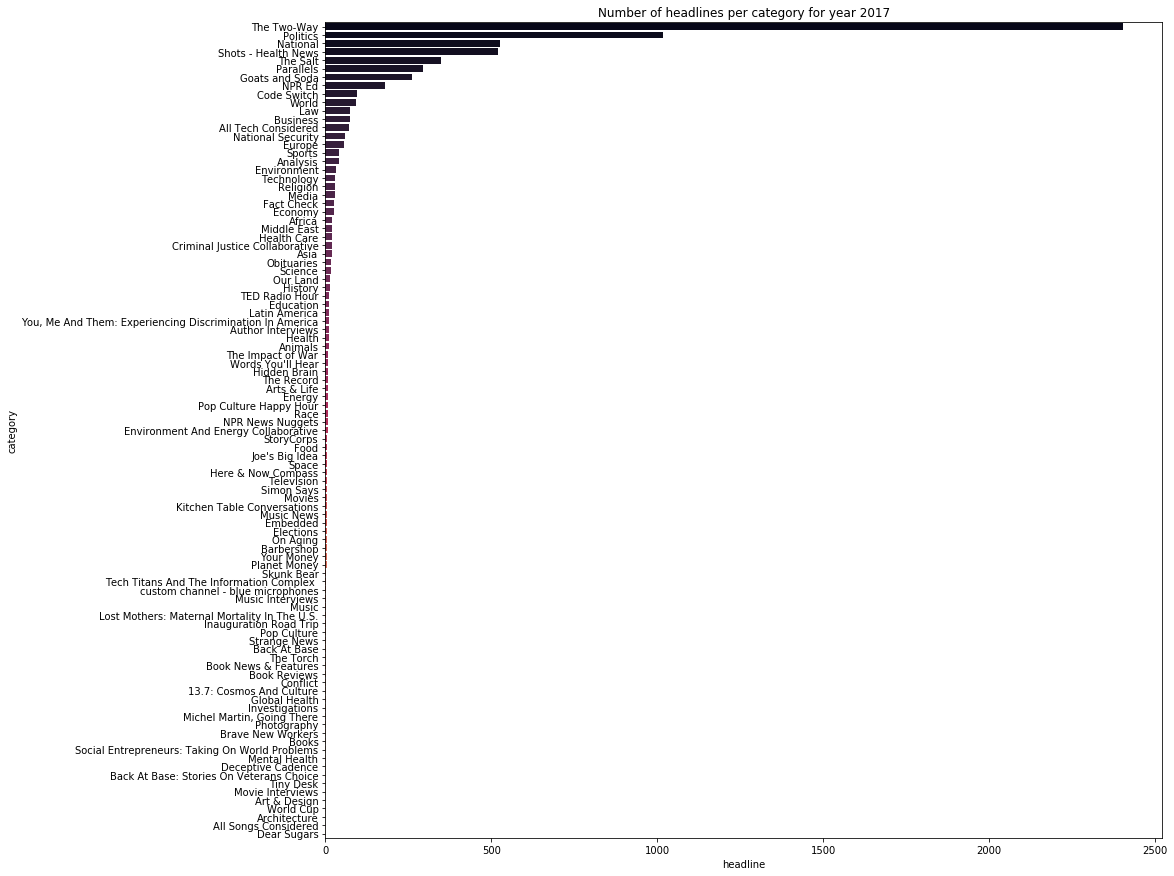

Top category The Two-Way for year 2018


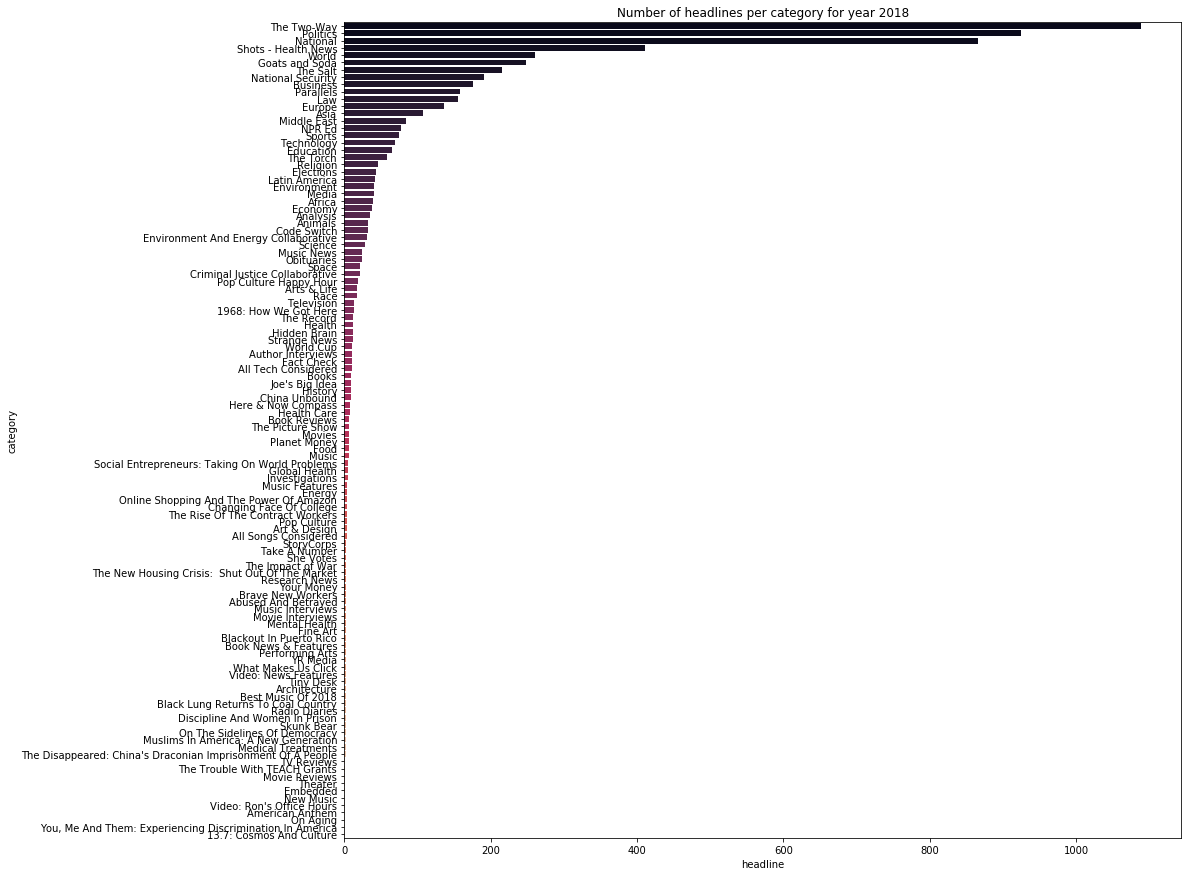

Top category National for year 2019


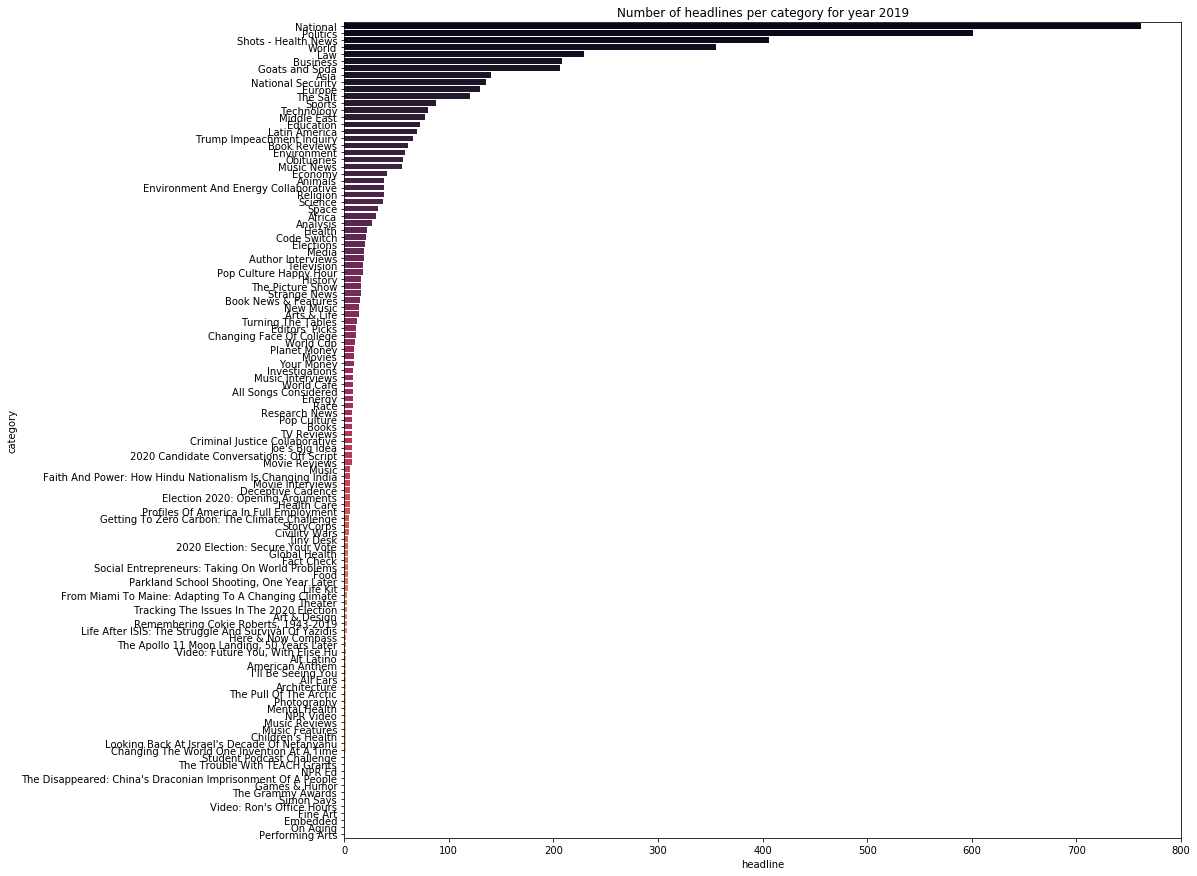

Top category Coronavirus Live Updates for year 2020


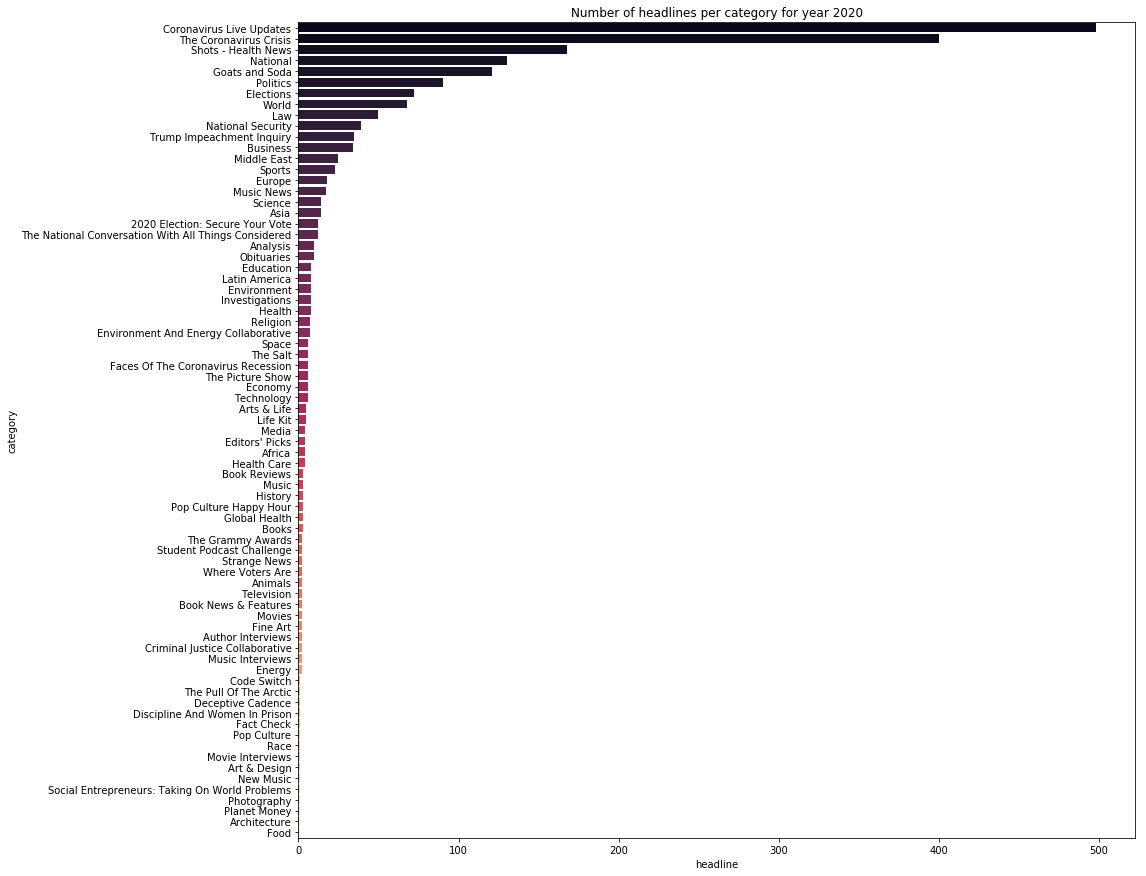

In [108]:
w, h= 15, 25
plot_per_year(y2, w, h)